# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [79]:
# Import essential libraries
# Core Libraries
import numpy as np                  # Numerical computations
import pandas as pd                 # Data manipulation and analysis
import os                           # Directory operations
import random                       # Random seed setting

# Data Visualization
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical plotting

# Image Processing
from PIL import Image               # Image handling

# TensorFlow / Keras for Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Sklearn Utilities
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import zipfile
import os

Load the dataset.

In [82]:
# Load and unzip the dataset
zip_file_path = 'data.zip'
extracted_dir = 'waste_segregation'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print("Dataset extracted successfully.")

Dataset extracted successfully.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [88]:
# Create a function to load the raw images
def load_images_from_folder(base_path, categories, image_size=(128, 128)):
    """
    Loads and processes images from folders without relying on file extensions.
    Skips directories and only processes files.
    """
    images = []
    labels = []

    for label_index, category in enumerate(categories):
        folder_path = os.path.join(base_path, category)

        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            
            # Skip directories
            if os.path.isdir(file_path):
                continue

            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize(image_size)
                images.append(np.array(img))
                labels.append(label_index)
            except Exception as e:
                print(f"❌ Error loading image {file_path}: {e}")

    return np.array(images), np.array(labels)

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

✅ Categories: ['Paper', 'Food_Waste', 'Metal', 'Cardboard', 'Other', 'Glass', 'Plastic']
✅ Loaded images: (7625, 128, 128, 3)
✅ Labels shape: (7625,)
🧪 Train shape: (6100, 128, 128, 3) (6100, 7)
🧪 Val shape: (1525, 128, 128, 3) (1525, 7)


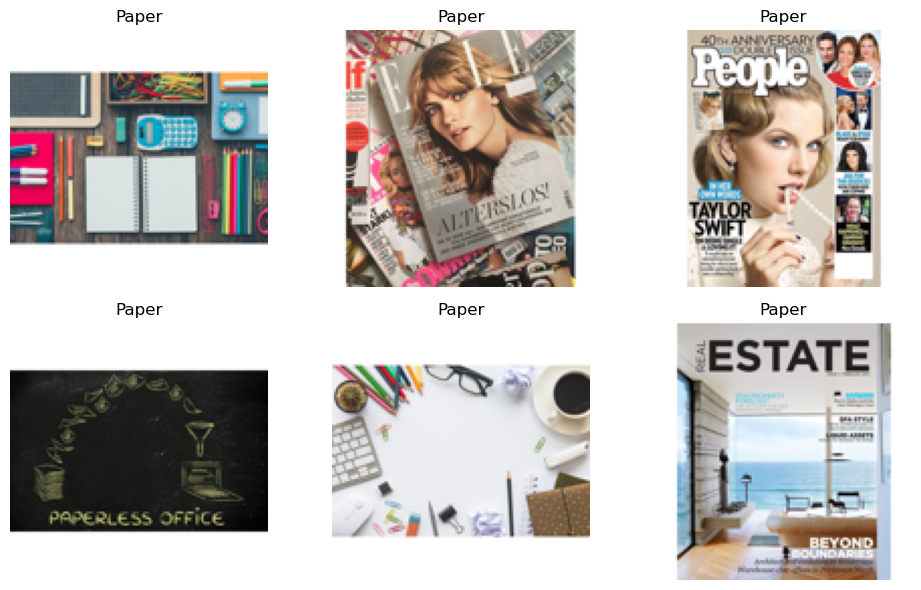

In [92]:
base_path = 'waste_segregation/data'

# Filter only actual folders (skip .DS_Store and other non-folder files)
categories = [folder for folder in os.listdir(base_path) 
              if os.path.isdir(os.path.join(base_path, folder))]

print("✅ Categories:", categories)

# Now call the function
X, y = load_images_from_folder(base_path, categories)

print("✅ Loaded images:", X.shape)
print("✅ Labels shape:", y.shape)

num_classes = len(categories)
y_cat = to_categorical(y, num_classes)

X_train, X_val, y_train, y_val = train_test_split(
    X, y_cat, test_size=0.2, stratify=y, random_state=42
)

print("🧪 Train shape:", X_train.shape, y_train.shape)
print("🧪 Val shape:", X_val.shape, y_val.shape)

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X[i])
    label_index = np.argmax(y_cat[i])
    plt.title(categories[label_index])
    plt.axis('off')
plt.tight_layout()
plt.show()

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

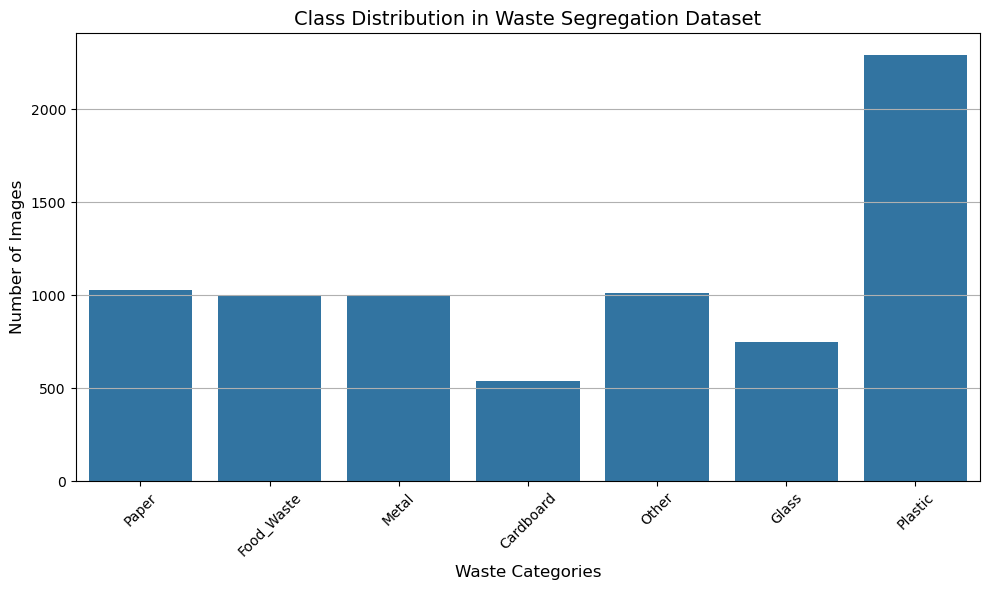

In [96]:
# Visualise Data Distribution

class_counts = np.bincount(y)
class_names = [categories[i] for i in range(len(class_counts))]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts)
plt.xlabel("Waste Categories", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Class Distribution in Waste Segregation Dataset", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

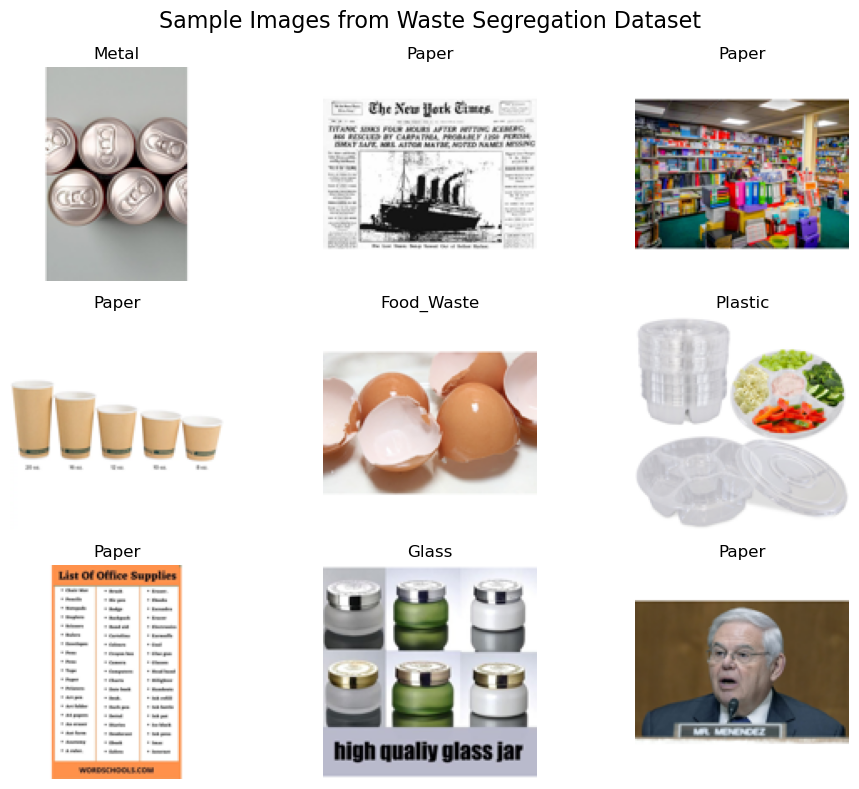

In [98]:
# Visualise Sample Images (across different labels)
num_samples = 9
plt.figure(figsize=(10, 8))

for i in range(num_samples):
    index = np.random.randint(0, len(X))  # Random index
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[index])
    label_index = y[index]                # original y (not one-hot)
    plt.title(categories[label_index])
    plt.axis('off')

plt.suptitle("Sample Images from Waste Segregation Dataset", fontsize=16)
plt.tight_layout()
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [100]:
# Find the smallest and largest image dimensions from the data set
def get_image_dimensions(base_path, categories):
    widths, heights = [], []
    
    for category in categories:
        folder = os.path.join(base_path, category)
        for fname in os.listdir(folder):
            file_path = os.path.join(folder, fname)
            if os.path.isdir(file_path):
                continue
            try:
                img = Image.open(file_path)
                widths.append(img.width)
                heights.append(img.height)
            except:
                continue

    return widths, heights

base_path = 'waste_segregation/data'
categories = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

widths, heights = get_image_dimensions(base_path, categories)

print("📏 Smallest size:", min(widths), "x", min(heights))
print("📐 Largest size:", max(widths), "x", max(heights))


📏 Smallest size: 256 x 256
📐 Largest size: 256 x 256


In [101]:
# Resize the image dimensions
def load_images_resized(base_path, categories, image_size=(128, 128)):
    images = []
    labels = []

    for label_index, category in enumerate(categories):
        folder_path = os.path.join(base_path, category)
        for fname in os.listdir(folder_path):
            file_path = os.path.join(folder_path, fname)
            if os.path.isdir(file_path):
                continue
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize(image_size)
                images.append(np.array(img))
                labels.append(label_index)
            except:
                continue

    return np.array(images), np.array(labels)

X_resized, y_resized = load_images_resized(base_path, categories, image_size=(128, 128))


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [110]:
num_classes = len(np.unique(y_resized))  # should be 7
y_encoded = to_categorical(y_resized, num_classes=num_classes)

print("✅ Encoded labels shape:", y_encoded.shape)

✅ Encoded labels shape: (7625, 7)


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [114]:
# Assign specified parts of the dataset to train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_resized, y_encoded, 
    test_size=0.2, 
    stratify=y_resized,  # Use raw labels (not one-hot) for stratification
    random_state=42
)

# Display shapes
print(f"✅ X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_val shape:   {X_val.shape}, y_val shape:   {y_val.shape}")


✅ X_train shape: (6100, 128, 128, 3), y_train shape: (6100, 7)
✅ X_val shape:   (1525, 128, 128, 3), y_val shape:   (1525, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [120]:
# Build and compile the model

input_shape = X_train.shape[1:]  # (128, 128, 3)
num_classes = y_train.shape[1]   # 7

# Build model
model = Sequential()

# Conv Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv Layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv Layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289,479 (16.36 MB)

 Trainable params: 4,289,031 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [122]:
# Training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Optional: Save best model (optional)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Start training
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],  # You can remove this if not needed
    verbose=1
)


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.2381 - loss: 2.5525

191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 216ms/step - accuracy: 0.2383 - loss: 2.5500 - val_accuracy: 0.3384 - val_loss: 1.7651
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 242ms/step - accuracy: 0.3096 - loss: 1.8006 - val_accuracy: 0.3292 - val_loss: 1.8523
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.3338 - loss: 1.7513

191/191 ━━━━━━━━━━━━━━━━━━━━ 52s 270ms/step - accuracy: 0.3338 - loss: 1.7513 - val_accuracy: 0.3502 - val_loss: 1.9157
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.3410 - loss: 1.7169

191/191 ━━━━━━━━━━━━━━━━━━━━ 52s 273ms/step - accuracy: 0.3410 - loss: 1.7169 - val_accuracy: 0.3810 - val_loss: 1.8448
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.3721 - loss: 1.6470

191/191 ━━━━━━━━━━━━━━━━━━━━ 52s 270ms/step - accuracy: 0.3721 - loss: 1.6470 - val_accuracy: 0.4066 - val_loss: 1.6513
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.3777 - loss: 1.6015

191/191 ━━━━━━━━━━━━━━━━━━━━ 51s 266ms/step - accuracy: 0.3777 - loss: 1.6015 - val_accuracy: 0.4111 - val_loss: 1.6925
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.3956 - loss: 1.5505

191/191 ━━━━━━━━━━━━━━━━━━━━ 52s 271ms/step - accuracy: 0.3956 - loss: 1.5506 - val_accuracy: 0.4341 - val_loss: 1.6065
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.4009 - loss: 1.5523

191/191 ━━━━━━━━━━━━━━━━━━━━ 50s 260ms/step - accuracy: 0.4009 - loss: 1.5523 - val_accuracy: 0.4374 - val_loss: 1.5368
Epoch 9/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.4182 - loss: 1.4847

191/191 ━━━━━━━━━━━━━━━━━━━━ 50s 263ms/step - accuracy: 0.4182 - loss: 1.4848 - val_accuracy: 0.4662 - val_loss: 1.5320
Epoch 10/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.4339 - loss: 1.4544

191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 276ms/step - accuracy: 0.4339 - loss: 1.4544 - val_accuracy: 0.4741 - val_loss: 1.4832
Epoch 11/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.4497 - loss: 1.4144

191/191 ━━━━━━━━━━━━━━━━━━━━ 52s 272ms/step - accuracy: 0.4497 - loss: 1.4144 - val_accuracy: 0.4931 - val_loss: 1.5052
Epoch 12/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.4593 - loss: 1.3808

191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 241ms/step - accuracy: 0.4592 - loss: 1.3809 - val_accuracy: 0.4938 - val_loss: 1.4643
Epoch 13/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 45s 238ms/step - accuracy: 0.4584 - loss: 1.3744 - val_accuracy: 0.4452 - val_loss: 1.7824
Epoch 14/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 241ms/step - accuracy: 0.4768 - loss: 1.3376 - val_accuracy: 0.4911 - val_loss: 1.4769
Epoch 15/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.4791 - loss: 1.3133

191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 245ms/step - accuracy: 0.4792 - loss: 1.3132 - val_accuracy: 0.4977 - val_loss: 1.5571
Epoch 16/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.4901 - loss: 1.2977

191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 246ms/step - accuracy: 0.4901 - loss: 1.2976 - val_accuracy: 0.4984 - val_loss: 1.5966
Epoch 17/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.5214 - loss: 1.2203

191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 245ms/step - accuracy: 0.5214 - loss: 1.2203 - val_accuracy: 0.5016 - val_loss: 1.6394


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4729 - loss: 1.4773
✅ Test Accuracy: 0.4938
✅ Test Loss: 1.4643
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
              precision    recall  f1-score   support

       Paper       0.59      0.33      0.42       206
  Food_Waste       0.46      0.58      0.51       200
       Metal       0.44      0.27      0.34       200
   Cardboard       0.58      0.58      0.58       108
       Other       0.56      0.24      0.34       202
       Glass       0.35      0.37      0.36       150
     Plastic       0.51      0.75      0.61       459

    accuracy                           0.49      1525
   macro avg       0.50      0.45      0.45      1525
weighted avg       0.50      0.49      0.47      1525



/var/folders/vz/sfqnw7g903x63wtlrj96b80c0000gn/T/ipykernel_5241/2950831406.py:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


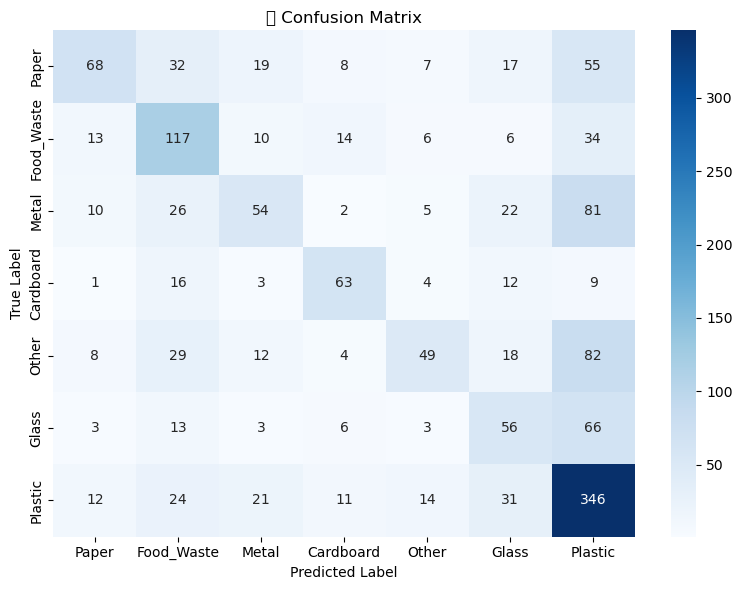

In [126]:
# Evaluate on the test set; display suitable metrics
test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

y_pred_probs = model.predict(X_val)
y_pred = y_pred_probs.argmax(axis=1)        # Predicted class labels
y_true = y_val.argmax(axis=1)   

print(classification_report(y_true, y_pred, target_names=categories))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [133]:
# Define augmentation steps to augment images

train_datagen = ImageDataGenerator(
    rotation_range=20,         # Random rotation (degrees)
    width_shift_range=0.1,     # Horizontal shift
    height_shift_range=0.1,    # Vertical shift
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Flip images horizontally
    vertical_flip=False,       # Optional: flip vertically
    fill_mode='nearest'        # Fill in pixels after shift/rotation
)

# For validation/test: only rescale
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

history_aug = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 44s 228ms/step - accuracy: 0.3870 - loss: 1.6503 - val_accuracy: 0.4643 - val_loss: 1.6106
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 54s 284ms/step - accuracy: 0.3806 - loss: 1.6470 - val_accuracy: 0.4616 - val_loss: 1.6655
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 297ms/step - accuracy: 0.3815 - loss: 1.6012 - val_accuracy: 0.4977 - val_loss: 1.4835
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 285ms/step - accuracy: 0.3899 - loss: 1.6067 - val_accuracy: 0.4479 - val_loss: 1.5469
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 288ms/step - accuracy: 0.3903 - loss: 1.6083 - val_accuracy: 0.5016 - val_loss: 1.3918
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 288ms/step - accuracy: 0.3994 - loss: 1.5752 - val_accuracy: 0.4630 - val_loss: 1.7148
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 58s 305ms/step - accuracy: 0.4122 - loss: 1.5779 - val_accuracy: 0.4911 - val_loss: 1.4804
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 296ms/step - accuracy: 0.4108 - loss: 1

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

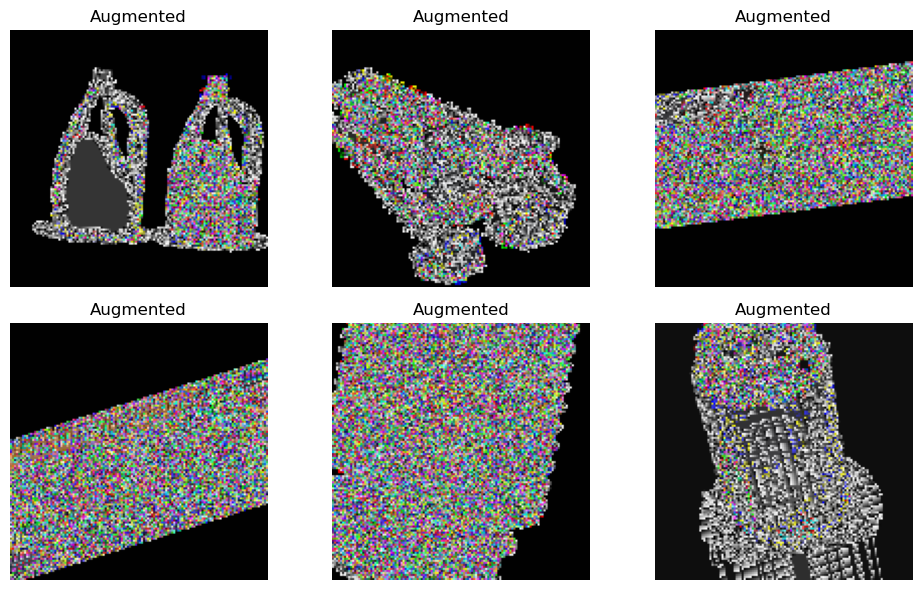

In [141]:
# Create a function to augment the images
augmented_images, _ = next(train_generator)

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    img = augmented_images[i]
    img = (img * 255).astype('uint8')  # Convert to displayable format
    plt.imshow(img)
    plt.title("Augmented")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results